# Illustrative example for computing and visualizing mean delta changes from regionally aggregated data 

The only REQUIREMENTS to reproduce this example are:
 - R 
 - R packages magrittr and httr

First we need to load the packages and the function to run the script:

In [27]:
## The package magrittr is used to pipe (%>%) sequences of data operations improving readability
#install.packages("magrittr")
library(magrittr)
## The package httr is used towork with URLs and HTTP
#install.packages("httr")
library(httr)

# Function computeDeltas (available at this repo is used) to compute the mean delta changes:
source("https://raw.githubusercontent.com/SantanderMetGroup/ATLAS/devel/aggregated-datasets/scripts/computeDeltas.R")


Select season, baseline period (ref.period), future periods (periods), area and scenario (experiment):

In [11]:
### SET ARGUMENTS -----------------------------

# select season, use c(12,1,2) for winter
season <- 1:12 
# select reference period
ref.period <- 1850:1900
# select warming levels or list of future periods, e.g. list(c(2021, 2040), c(2041, 2060), c(2081, 2100))
periods <- c("1.5", "2", "3", "4")
# select the area, i.e. "land", "sea" or "landsea"
area <- "landsea"
# select scenario, i.e. "rcp26", "rcp45", "rcp85" (select a single scenario for computing WLs)
experiment <- "rcp85"


## CMIP5 temperature
In the first example we will consider CMIP5 temperature data, therefore we also set arguments `project` and `var` accordingly.

In [12]:

# Set parameters to calculate mean delta changes for CMIP5 temperature ("tas"):
# select project "CMIP5", "CMIP6" ("CORDEX" will be available soon)
project = "CMIP5"
# select variable, i.e. "tas" or "pr"
var <- "tas"


To calculate mean delta changes the `computeDelta` function is used with the already set parameters.

In [ ]:
WL.cmip5.tas <- computeDeltas(project, var, experiment, season, ref.period, periods, area)

The result is a `list` of `data.frames` for all reference regions:

In [14]:
names(WL.cmip5.tas)

[1] "GIC"   "NWN"   "NEN"   "WNA"   "CNA"   "ENA"   "NCA"   "SCA"   "CAR"  
[10] "NWS"   "NSA"   "NES"   "SAM"   "SWS"   "SES"   "SSA"   "NEU"   "WCE"  
[19] "EEU"   "MED"   "SAH"   "WAF"   "CAF"   "NEAF"  "SEAF"  "WSAF"  "ESAF" 
[28] "MDG"   "RAR"   "WSB"   "ESB"   "RFE"   "WCA"   "ECA"   "TIB"   "EAS"  
[37] "ARP"   "SAS"   "SEA"   "NAU"   "CAU"   "EAU"   "SAU"   "NZ"    "EAN"  
[46] "WAN"   "ARO"   "NPO"   "EPO"   "SPO"   "NAO"   "EAO"   "SAO"   "ARS"  
[55] "BOB"   "EIO"   "SIO"   "SOO"   "world"

Each slot of the `list` contains a `data.frame` of mean delta changes with model runs in rows and each future period/warming-level in columns, e.g.:

In [15]:
head(WL.cmip5.tas$GIC)

,rcp85,rcp85,rcp85,rcp85
ACCESS1-0_r1i1p1,2.691033,3.734229,5.503166,7.247841
ACCESS1-3_r1i1p1,3.396157,4.274736,6.213986,8.695823
bcc-csm1-1-m_r1i1p1,2.542902,3.822049,5.791845,7.468491
bcc-csm1-1_r1i1p1,3.215060,4.790673,6.944943,8.944731
CanESM2_r1i1p1,2.539118,3.318576,5.156897,6.890342
CCSM4_r1i1p1,2.603593,3.010913,4.756375,6.089779


If you are only interested in a subet of regions, you can retain them as follows.

In [16]:
# e.g. Europe regions
myRegs <- c("NEU", "WCE", "MED", "EEU")
WL.cmip5.tas <- WL.cmip5.tas[myRegs]
str(WL.cmip5.tas)

List of 4
 $ NEU: num [1:28, 1:4] 1.68 1.51 2.09 2.74 1.98 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:28] "ACCESS1-0_r1i1p1" "ACCESS1-3_r1i1p1" "bcc-csm1-1-m_r1i1p1" "bcc-csm1-1_r1i1p1" ...
  .. ..$ : chr [1:4] "rcp85" "rcp85" "rcp85" "rcp85"
 $ WCE: num [1:28, 1:4] 2.2 1.83 1.4 1.85 1.6 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:28] "ACCESS1-0_r1i1p1" "ACCESS1-3_r1i1p1" "bcc-csm1-1-m_r1i1p1" "bcc-csm1-1_r1i1p1" ...
  .. ..$ : chr [1:4] "rcp85" "rcp85" "rcp85" "rcp85"
 $ MED: num [1:28, 1:4] 1.87 1.71 1.28 1.76 1.48 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:28] "ACCESS1-0_r1i1p1" "ACCESS1-3_r1i1p1" "bcc-csm1-1-m_r1i1p1" "bcc-csm1-1_r1i1p1" ...
  .. ..$ : chr [1:4] "rcp85" "rcp85" "rcp85" "rcp85"
 $ EEU: num [1:28, 1:4] 3.03 2.22 2.53 2.35 2.52 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:28] "ACCESS1-0_r1i1p1" "ACCESS1-3_r1i1p1" "bcc-csm1-1-m_r1i1p1" "bcc-csm1-1_r1i1p1" ...
  .. ..$ : chr [1:4] "rcp85" "rcp85" "rcp85" "rcp85"


Lets calculate the median and 10 and 90 percentiles of the multi-model with the base function `apply`:

In [17]:
WLmediana.cmip5.tas <- lapply(WL.cmip5.tas, apply, 2, median, na.rm = T)
WLp90.cmip5.tas <- lapply(WL.cmip5.tas, apply, 2, quantile, 0.9, na.rm = T)
WLp10.cmip5.tas <- lapply(WL.cmip5.tas, apply, 2, quantile, 0.1, na.rm = T)

Note that now there is only one row in each data.frame that correspondonds to the multi-model, e.g.:

In [18]:
str(WLmediana.cmip5.tas)

List of 4
 $ NEU: Named num [1:4] 2.2 2.77 4.04 5.17
  ..- attr(*, "names")= chr [1:4] "rcp85" "rcp85" "rcp85" "rcp85"
 $ WCE: Named num [1:4] 1.8 2.21 3.41 4.51
  ..- attr(*, "names")= chr [1:4] "rcp85" "rcp85" "rcp85" "rcp85"
 $ MED: Named num [1:4] 1.75 2.31 3.48 4.72
  ..- attr(*, "names")= chr [1:4] "rcp85" "rcp85" "rcp85" "rcp85"
 $ EEU: Named num [1:4] 2.49 3.13 4.62 6.14
  ..- attr(*, "names")= chr [1:4] "rcp85" "rcp85" "rcp85" "rcp85"


Here is the simplest example of a first plot:

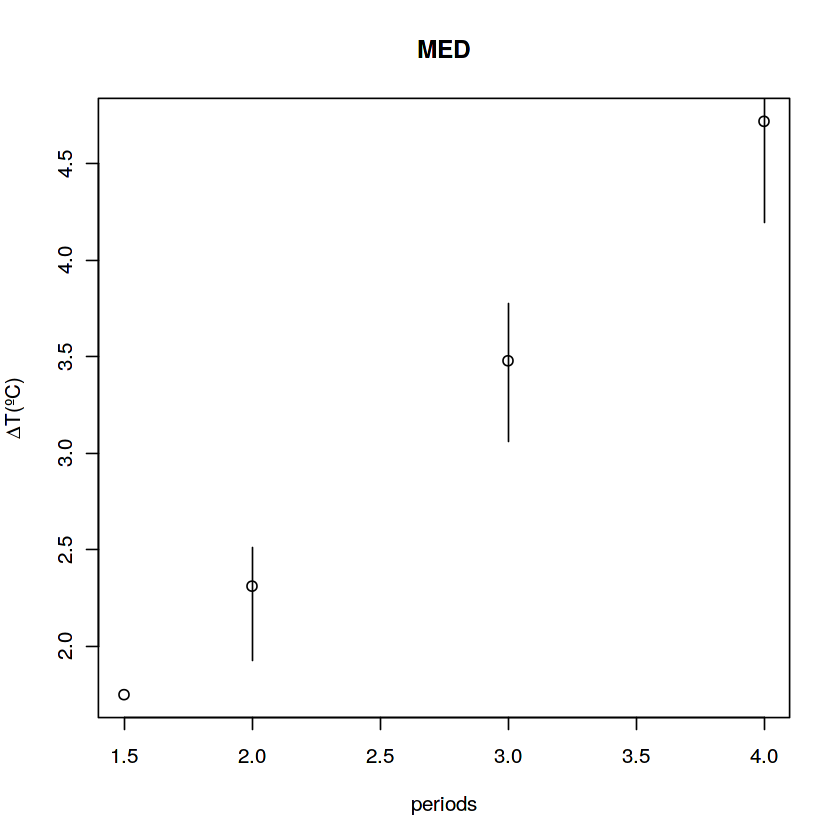

In [19]:
plot(periods, WLmediana.cmip5.tas$MED, ylab = bquote(Delta*"T(ºC)"), main = "MED")
segments(1:length(periods), WLp10.cmip5.tas$MED, 1:length(periods), WLp90.cmip5.tas$MED)

## CMIP5 precipitation
Here we repeat the operation but considering precipitation this time:

In [ ]:
# Set parameters to calculate mean delta changes for CMIP5 precipitation ("pr"):
# select project "CMIP5", "CMIP6" ("CORDEX" will be available soon)
project = "CMIP5"
# select variable, i.e. "tas" or "pr"
var <- "pr"
# select scenario, i.e. "rcp26", "rcp45", "rcp85" (select a single scenario for computing WLs)
experiment <- "rcp85"

WL.cmip5.pr <- computeDeltas(project, var, experiment, season, ref.period, periods, area)

WL.cmip5.pr <- WL.cmip5.pr[myRegs]

WLmediana.cmip5.pr <- lapply(WL.cmip5.pr, apply, 2, median, na.rm = T)
WLp90.cmip5.pr <- lapply(WL.cmip5.pr, apply, 2, quantile, 0.9, na.rm = T)
WLp10.cmip5.pr <- lapply(WL.cmip5.pr, apply, 2, quantile, 0.1, na.rm = T)


## CMIP6
Next we repeat the operation for CMIP6. For temperature first...

In [ ]:

# Set parameters to calculate mean delta changes for CMIP6 temperature ("tas"):
# select project "CMIP5", "CMIP6" ("CORDEX" will be available soon)
project = "CMIP6"
# select variable, i.e. "tas" or "pr"
var <- "tas"
# select scenario, i.e. "ssp126", "ssp245", "ssp585" (select a single scenario for computing WLs)
experiment <- "ssp585"

WL.cmip6.tas <- computeDeltas(project, var, experiment, season, ref.period, periods, area)

WL.cmip6.tas <- WL.cmip6.tas[myRegs]

WLmediana.cmip6.tas <- lapply(WL.cmip6.tas, apply, 2, median, na.rm = T)
WLp90.cmip6.tas <- lapply(WL.cmip6.tas, apply, 2, quantile, 0.9, na.rm = T)
WLp10.cmip6.tas <- lapply(WL.cmip6.tas, apply, 2, quantile, 0.1, na.rm = T)


and precipitation finally:

In [ ]:
# Set parameters to calculate mean delta changes for CMIP6 precipitation ("pr"):
# select project "CMIP5", "CMIP6" ("CORDEX" will be available soon)
project = "CMIP6"
# select variable, i.e. "tas" or "pr"
var <- "pr"
# select scenario, i.e. "ssp126", "ssp245", "ssp585" (select a single scenario for computing WLs)
experiment <- "ssp585"

WL.cmip6.pr <- computeDeltas(project, var, experiment, season, ref.period, periods, area)

WL.cmip6.pr <- WL.cmip6.pr[myRegs]

WLmediana.cmip6.pr <- lapply(WL.cmip6.pr, apply, 2, median, na.rm = T)
WLp90.cmip6.pr <- lapply(WL.cmip6.pr, apply, 2, quantile, 0.9, na.rm = T)
WLp10.cmip6.pr <- lapply(WL.cmip6.pr, apply, 2, quantile, 0.1, na.rm = T)

## Plot the results

We select the same colors for the different warming levels for CMIP5 and CMIP6 but using transparency for the first.

In [ ]:
col1 <- c(rgb(0.55,0,0.55,0.5), rgb(1, 0.73, 0.06, 0.5),rgb(0, 0, 0, 0.5), rgb(0.5, 0.3, 0.16, 0.5))
col2 <- c(rgb(0.55,0,0.55), rgb(1, 0.73, 0.06), rgb(0, 0, 0), rgb(0.5, 0.3, 0.16))

And finally we plot the results:

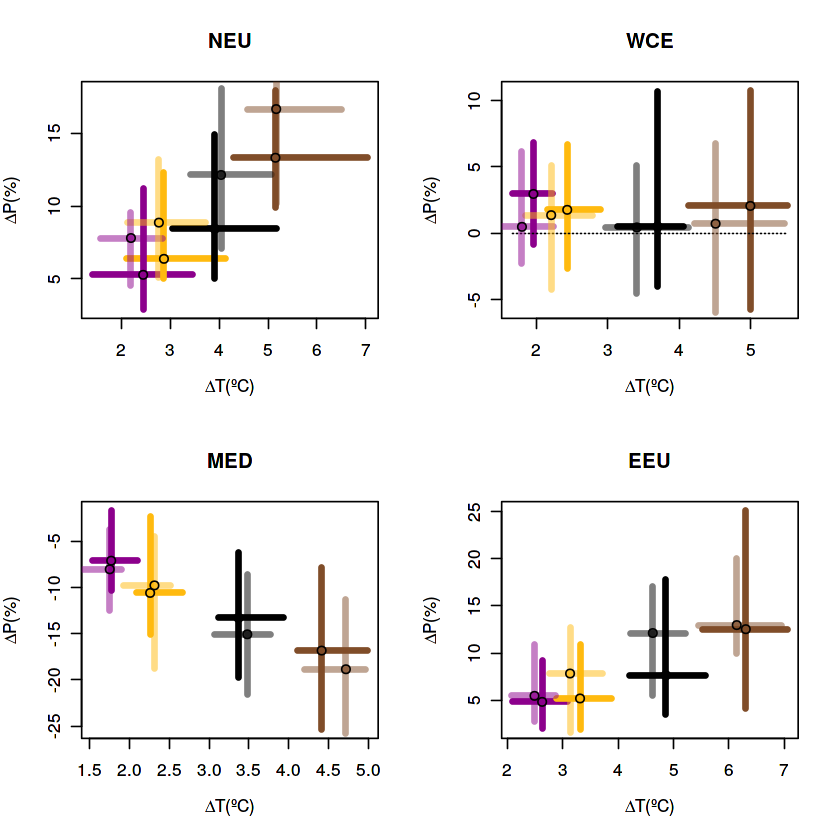

In [24]:
par(mfrow = c(2, 2))
for(i in myRegs) {
  plot(WLmediana.cmip6.tas[[i]], WLmediana.cmip6.pr[[i]], pch = 21,
       bg = rgb(1,0,0,0), col = rgb(1,0,0,0), 
       xlim = c(min(WLp10.cmip6.tas[[i]]), max(WLp90.cmip6.tas[[i]])),
       ylim = c(min(WLp10.cmip6.pr[[i]]), max(WLp90.cmip6.pr[[i]])),
       main = i,
       xlab = bquote(Delta*"T(ºC)"), ylab = bquote(Delta*"P(%)"))
  segments(WLp10.cmip6.tas[[i]], WLmediana.cmip6.pr[[i]], WLp90.cmip6.tas[[i]], WLmediana.cmip6.pr[[i]], col = col2, lwd = 4)
  segments(WLmediana.cmip6.tas[[i]], WLp10.cmip6.pr[[i]], WLmediana.cmip6.tas[[i]], WLp90.cmip6.pr[[i]], col = col2, lwd = 4)
  segments(min(WLp10.cmip6.tas[[i]]), 0, max(WLp90.cmip6.tas[[i]]), 0, lty = 3)
  segments(WLp10.cmip5.tas[[i]], WLmediana.cmip5.pr[[i]], WLp90.cmip5.tas[[i]], WLmediana.cmip5.pr[[i]], col = col1, lwd = 4)
  segments(WLmediana.cmip5.tas[[i]], WLp10.cmip5.pr[[i]], WLmediana.cmip5.tas[[i]], WLp90.cmip5.pr[[i]], col = col1, lwd = 4)
  points(WLmediana.cmip6.tas[[i]], WLmediana.cmip6.pr[[i]], pch = 21, bg = col2, xlim = c(0, 7))
  points(WLmediana.cmip5.tas[[i]], WLmediana.cmip5.pr[[i]], pch = 21, bg = col1, xlim = c(0, 7))
}